<a href="https://colab.research.google.com/github/erohin94/data-analysis/blob/main/Proekt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

Сколько транзакций завершились ошибкой?

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.


Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)

name – имя пользователя

transaction – статус транзакции

minute* – сколько минут прошло с начала дня

*Доступна в данных с 5 шага.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/transaction_data.csv')

**Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.**

In [ ]:
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [ ]:
df.shape

(5315, 3)

In [ ]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [ ]:
df.isnull().value_counts()

date   name   transaction
False  False  False          5315
dtype: int64

In [ ]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


**Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.**

**Сколько транзакций завершились ошибкой?**

In [ ]:
df.transaction.drop_duplicates()

0        cancelled
1      successfull
445          error
Name: transaction, dtype: object

In [ ]:
count_transact = df.groupby('transaction', as_index = False).agg({'date' : 'count'}).rename(columns = {'date' : 'count_transaction'})
count_transact

,transaction,count_transaction
0,cancelled,1619
1,error,4
2,successfull,3692


<Axes: xlabel='transaction', ylabel='count_transaction'>

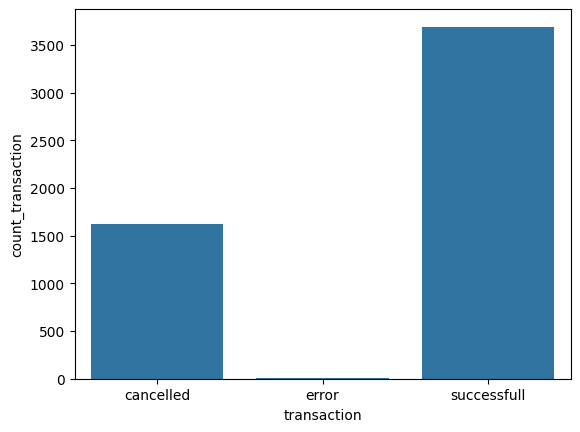

In [ ]:
sns.barplot(count_transact, x="transaction", y="count_transaction")

In [ ]:
count_transact.count_transaction.tolist()[1]

4

**Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.**

In [ ]:
count_transact_user = df.query('transaction == "successfull"').groupby('name', as_index = False).agg({'date' : 'count'}).rename(columns = {'date' : 'count_transaction'})
count_transact_user

<Axes: ylabel='Count'>

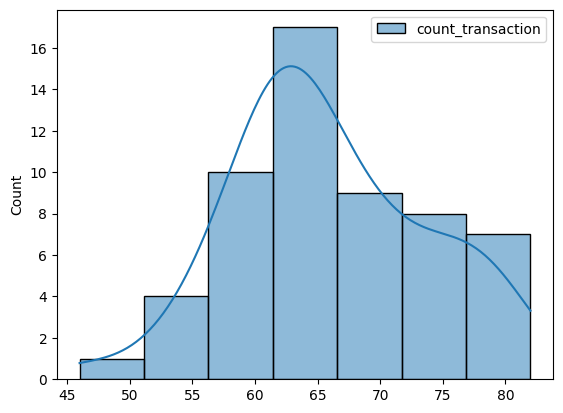

In [ ]:
sns.histplot(data=count_transact_user, kde=True)

In [ ]:
count_transact_user.describe()

,count_transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


**Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)**

**Постройте сводную таблицу user_vs_minute_pivot, где**

**столбцы - имена пользователей**

**строки – минута времени осуществления операции**

**значения – число совершенных операций в указанную минуту**

**Пропущенные значения заполните нулями.**

In [ ]:
df2 = pd.read_csv('/content/transaction_data_updated.csv')


In [ ]:
df2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [ ]:
#метод pivot_table - считает и группирует автоматически в отличие от просто pivot
svod = pd.pivot_table(df2, values='transaction',
                      index='minute',
                      columns='name',
                      aggfunc="count",
                      fill_value = 0)
svod

In [ ]:
# Var 2 с помощью группировки

#Тоесть в первую минуту пользователем было совершено столько то транзакций
#Во вторую столько и тд
tr_numb = df2.groupby(['name','minute'], as_index = False) \
                      .agg({'transaction' : 'count'}) \
                      .rename(columns = {'transaction' : 'transaction_number'})

tr_numb

,name,minute,transaction_number
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [ ]:
piv_table = tr_numb.pivot(index = 'minute',
              columns='name',
              values = 'transaction_number')

piv_table

In [ ]:
piv_table.fillna(0, inplace = True)
piv_table

In [ ]:
#Сравним дата фреймы
svod == piv_table

In [ ]:
#Узнаем равны ли все ячейки или нет. Если равны то True, если нет False
#False может быть из за типов данных
#Как вариант, при первом своде, fillna сделать отдельно и данные будут одинаковые
#Т.е делать не fill_value = 0, а сделать svod.fillna(0, inplace = True)
svod.equals(piv_table)

False

**Коллега построил график, из данных по предыдущей сводной таблице. Изучите представленный график.**

**Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.**

**Имеются следующие данные:**

minute* – по оси x, минута транзакции (сколько минут прошло с начала дня)

по оси y - число транзакций, сколько транзакций совершено в эту минуту

<Axes: xlabel='minute'>

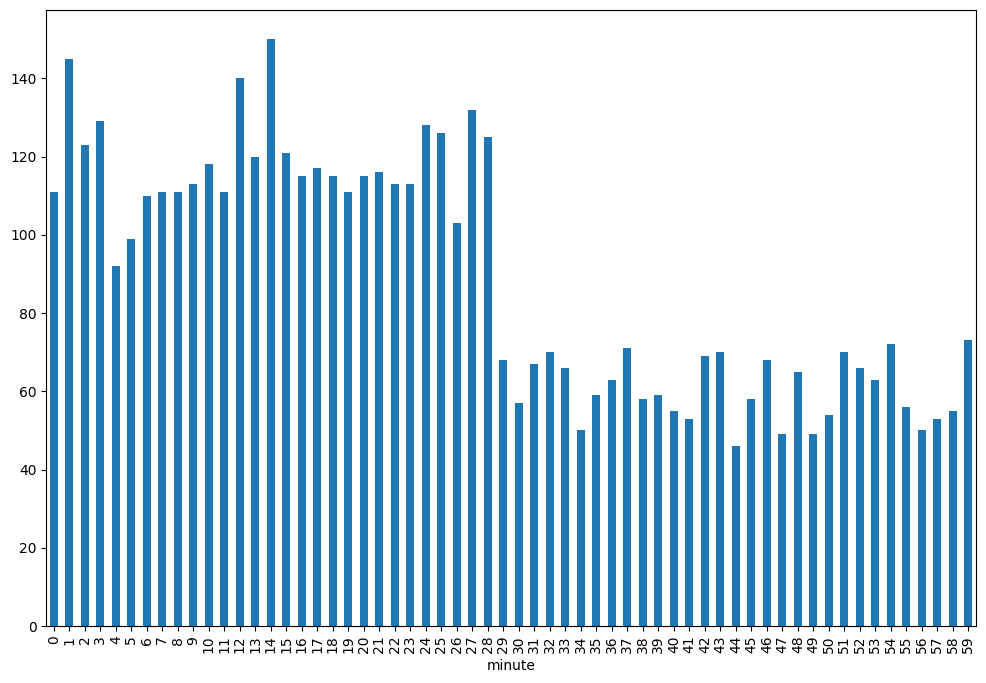

In [ ]:
# Просумируем значения по строке
# Тоесть для первой мин столько то транзакция, для второй столько то и тд
piv_table.sum(axis = 1).plot.bar(figsize = (12, 8))

In [ ]:
df2

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


Ответ, исскусственно нагнали данных. Тоесть в наших данных выделяется только минутная часть.

Например date 2020-03-02 00:59:09 берем 59 минуту

Для date 2020-03-02 01:06:14 берем 6 минуту, час не учитывается

Поэтому первая половина графика более наполненная

Исправим ошибку данных


In [ ]:
df2['date'] = pd.to_datetime(df2['date'])

In [ ]:
df2.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

Теперь считаем число минут с которые прошли с полуночи 2020-03-02 00:00:00

In [ ]:
#Извлечем число минут
df2['true_minute'] = df2.date.dt.minute + df2.date.dt.hour*60
df2

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


<Axes: xlabel='true_minute', ylabel='Count'>

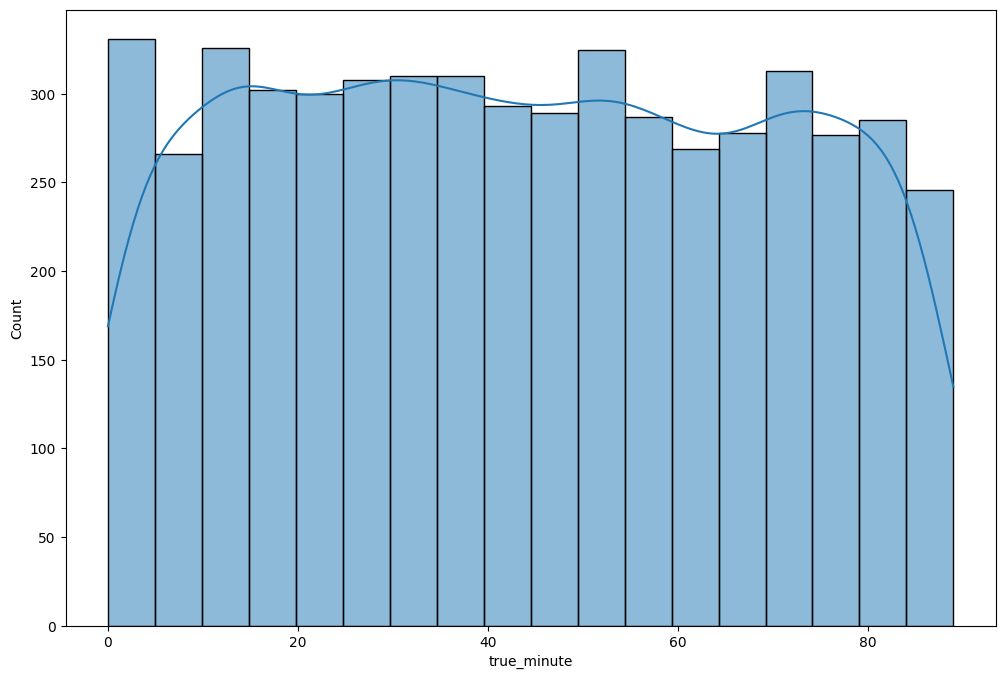

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(data = df2, x = 'true_minute', kde=True)


<Axes: ylabel='Frequency'>

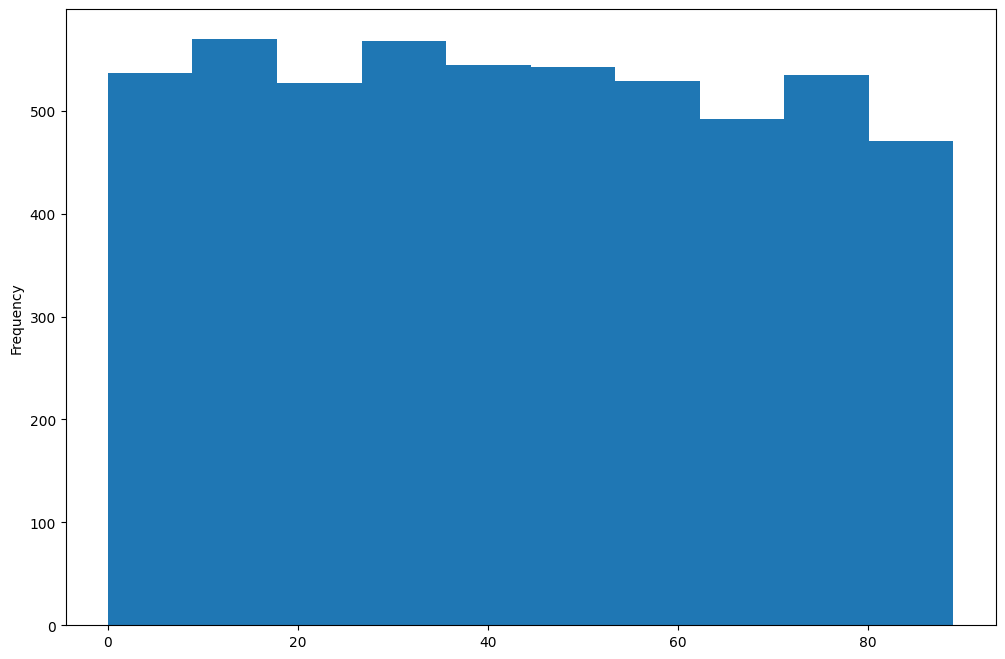

In [ ]:
plt.figure(figsize = (12,8))
df2['true_minute'].plot.hist()

In [ ]:
plt.figure(figsize = (15,8))

sns.countplot(df2, x="true_minute")